<a href="https://colab.research.google.com/github/LSDtopotools/lsdtt_notebooks/blob/master/lsdtopotools/channel_steepness_and_concavity_examples/extracting_knickpoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting knickpoints

Last updated by Simon M. Mudd on 22/04/2024

`lsdtt-chi-mapping` is one of the command line tools included in *LSDTopoTools*. This part of *LSDTopoTools* contains many routines for looking at channel steepness indices as well as concavity indices. In this example we will extract some knickpoints.

If you want more background you can read this papers:

* Gailleton, B., Mudd, S. M., Clubb, F. J., Peifer, D., and Hurst, M. D.: A segmentation approach for the reproducible extraction and quantification of knickpoints from river long profiles, Earth Surf. Dynam., 7, 211–230, https://doi.org/10.5194/esurf-7-211-2019, 2019.

If you use this software for your research please cite the above paper as appropriate and this software: https://doi.org/10.5281/zenodo.3245040

## Stuff we need to do if you are in colab (not required in the lsdtopotools pytools container)

**If you are in the `docker_lsdtt_pytools` docker container, you do not need to do any of this.
The following is for executing this code in the google colab environment only.**

If you are in the docker container you can skip to the **Download some data** section.

First we install `lsdtopotools`. The first line downloads the package and the second installs it. The `/dev/null` stuff is just to stop the notebook printing a bunch of text to screen.  

In [1]:
!wget https://pkgs.geos.ed.ac.uk/geos-jammy/pool/world/l/lsdtopotools2/lsdtopotools2_0.9-1geos~22.04.1_amd64.deb  &> /dev/null
!apt install ./lsdtopotools2_0.9-1geos~22.04.1_amd64.deb  &> /dev/null

The next line tests to see if it worked. If you get some output asking for a parameter file then `lsdtopotools` is installed. This notebook was tested on version 0.9.

In [2]:
!lsdtt-basic-metrics -v

|| Welcome to the LSDTopoTools basic metrics tool!     ||
|| This program has a number of options for calculating||
|| simple landscape metrics.                           ||
|| This program was developed by Simon M. Mudd         ||
||  at the University of Edinburgh                     ||
|| If you use these routines please cite:              ||
|| http://doi.org/10.5281/zenodo.4577879               ||
|| If you use the roughness routine please cite:       ||
|| https://www.doi.org/10.5194/esurf-3-483-2015        ||
|| Documentation can be found at:                      ||
|| https://lsdtopotools.github.io/LSDTT_documentation/ ||
|| This is LSDTopoTools2 version                       ||
|| 0.9
|| If the version number has a d at the end it is a    ||
||  development version.                               ||
|| You have called an LSDTopoTools program.            ||
|| Prepare to explore topographic data!                ||
|| You can find some examples of usage here:           ||
|| http

Now we install `lsdviztools`. We need to test if this is version 0.4.12:

In [3]:
!pip install lsdviztools  &> /dev/null
import lsdviztools
lsdviztools.__version__


'0.4.12'

## Download some data

We need to get some data to download.

For this example we will work near Santa Cruz, CA

We are going to download data using the opentopography scraper that is included with `lsdviztools`. You will need to get an opentopography.org account and copy in your API key.

You can sign up to an opentopography.org account here: https://portal.opentopography.org/myopentopo

In [5]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio

# YOU NEED TO PUT YOUR API KEY IN A FILE
your_OT_api_key_file = "my_OT_api_key.txt"

with open(your_OT_api_key_file, 'r') as file:
    print("I am reading you OT API key from the file "+your_OT_api_key_file)
    api_key = file.read().rstrip()
    print("Your api key starts with: "+api_key[0:4])

Dataset_prefix = "SC"
source_name = "COP30"

SC_DEM = bmt.ot_scraper(source = source_name,
                        lower_left_coordinates = [36.93516810706785, -122.33619592430614],
                        upper_right_coordinates = [37.231287577974676, -122.02562650945539],
                        prefix = Dataset_prefix,
                        api_key_file = your_OT_api_key_file)
SC_DEM.print_parameters()
SC_DEM.download_pythonic()
DataDirectory = "./"
Fname = Dataset_prefix+"_"+source_name+".tif"
gio.convert4lsdtt(DataDirectory,Fname)

I am reading you OT API key from the file my_OT_api_key.txt
Your api key starts with: 9515
I am taking your coordinates from the lower left list
I am taking your coordinates from the upper right list
I am reading you OT API key from the file my_OT_api_key.txt
The source is: COP30
The west longitude is: -122.33619592430614
The east longitude is: -122.10896709632588
The south latitude is: 37.2500340992498
The north latitude is: 36.93516810706785
The path is: ./
The prefix is: SC
The resolution is: 30
I am going to download a file from opentopography (I've removed the API key):
https://portal.opentopography.org/API/globaldem?demtype=COP30&south=36.93516810706785&north=37.2500340992498&west=-122.33619592430614&east=-122.10896709632588&outputFormat=GTiff
This might take a little while, depending on the size of the file. 
The filename will be:
./SC_COP30.tif
The path and file without path are:
./  SC_COP30.tif
Finished downloading
The projections is:
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID

'SC_COP30_UTM.bil'

We can check to see if the file has downloaded

In [14]:
!ls

lsdtopotools2_0.9-1geos~22.04.1_amd64.deb  sample_data		     SC_COP30_UTM.hdr
lsdtt-basic-metrics-version.txt		   SC_COP30.tif		     SC_COP30_UTM.tif
lsdtt_version.txt			   SC_COP30_UTM.bil	     Test_01.driver
my_OT_api_key.txt			   SC_COP30_UTM.bil.aux.xml


## A simple hillshade image

We can run `lsdtt-chi-mapping` with a little interface in `lsdviztools` called the `lsdtt_driver`. Here we are only going to write a hillshade raster.  

First we check if we are on version 0.4.12 or above.

In [7]:
import lsdviztools
lsdviztools.__version__

'0.4.12'

I we are in the correct version, carry on the the next steps.

In [8]:
import lsdviztools.lsdmapwrappers as lsdmw

In [15]:
Dataset_prefix = "SC"
source_name = "COP30"

lsdtt_parameters = {"write_hillshade" : "true"}
r_prefix = Dataset_prefix+"_"+source_name +"_UTM"
w_prefix = Dataset_prefix+"_"+source_name +"_UTM"
lsdtt_drive = lsdmw.lsdtt_driver(command_line_tool = "lsdtt-chi-mapping",
                                 read_prefix = r_prefix,
                                 write_prefix= w_prefix,
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling', 'lsdtt-valley-metrics']
Testing has been done against lsdtopotools v0.7
The command line tool is: lsdtt-chi-mapping
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: SC_COP30_UTM
The write prefix is: SC_COP30_UTM
The parameter dictionary is:
{'write_hillshade': 'true'}
Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


We can plot the image using a `lsdviztools` function. I am printing this to a file and then using the image display option since it allows us to make the figure a bit bigger and in addition you can keep the png image for other uses later.

You can save the figure as well. This allows you to show it in this notebook in a larger format:

In [16]:
%%capture
DataDirectory = "./"
# Use the capture comment to get rid of all the text
# But it will also not display an inline image
# So you need to call the image from the next line of code
# WARNING %%capture must be the first line in a code block (you can't even have comments above)
Base_file = r_prefix
this_img = lsdmw.SimpleHillshade(DataDirectory,Base_file,cmap="gist_earth",
                                 save_fig=True, size_format="geomorphology",dpi=600)

./SC_COP30_UTM_hillshade.png


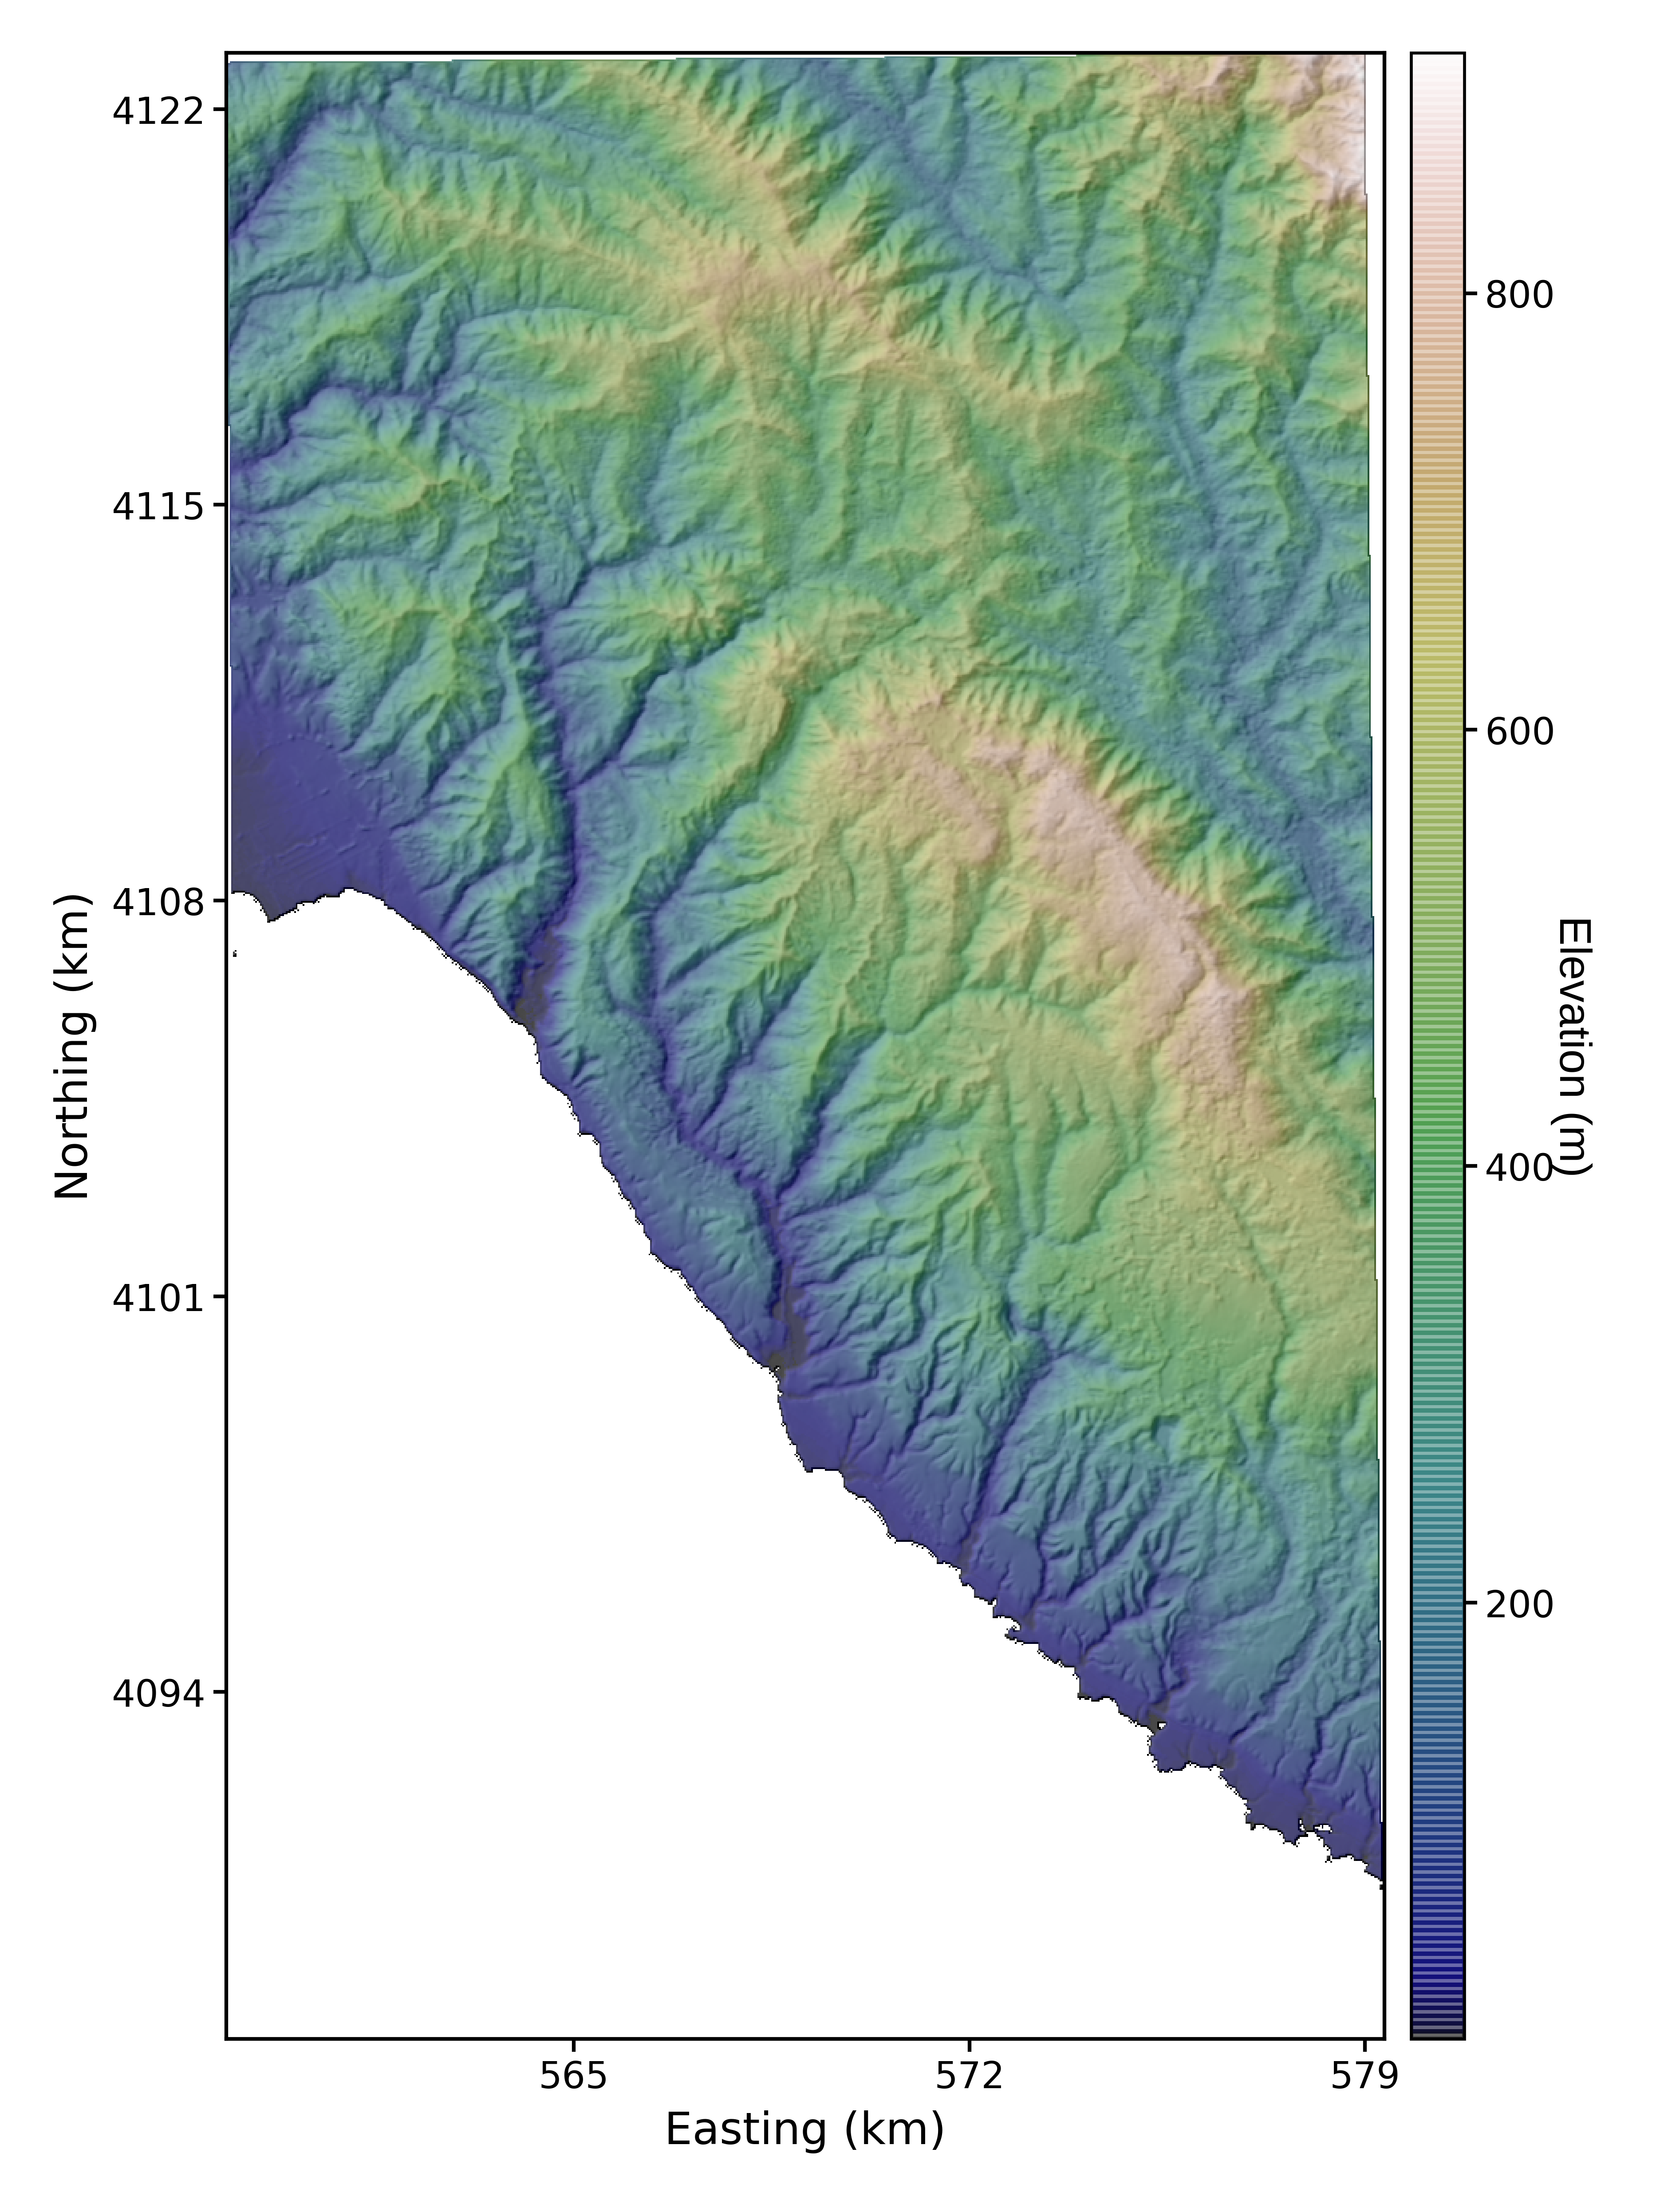

In [17]:
print(this_img)
from IPython.display import display, Image
display(Image(filename=this_img, width=800))

## Choosing basin outlets

One way to get all the basins we want it to make a file with the latitude and longitude of the outlets. We can go into google maps and right click on locations, and then copy these into a latitude and longitude list.

In [18]:
# Import pandas library
import pandas as pd

data = [ [37.103977560491835, -122.27688719084775],
         [37.04698035269795, -122.22620569548667],
         [37.01252435334153, -122.19055138486662],
         [36.98739273623374, -122.1518657359513],
         [36.98116618978382, -122.1381525397069]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['latitude', 'longitude'])

df.to_csv("basin_outlets.csv",index=False)
df.head()

latitude   longitude
0  37.103978 -122.276887
1  37.046980 -122.226206
2  37.012524 -122.190551
3  36.987393 -122.151866
4  36.981166 -122.138153

In [19]:
import rasterio
raster = rasterio.open("SC_COP30_UTM_hs.bil")
# Get the CRS
crs = raster.crs

print(crs)

EPSG:32610


In [21]:
# Make a geopandas dataframe from the basin outlets
import geopandas as gpd
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude,df.latitude), crs="EPSG:4326")
gdf = gdf.to_crs(raster.crs)
gdf.head(5)

latitude   longitude                        geometry
0  37.103978 -122.276887  POINT (564252.488 4106651.645)
1  37.046980 -122.226206  POINT (568807.371 4100364.010)
2  37.012524 -122.190551  POINT (572010.406 4096567.962)
3  36.987393 -122.151866  POINT (575476.877 4093809.916)
4  36.981166 -122.138153  POINT (576703.514 4093130.123)

<function matplotlib.pyplot.clf()>

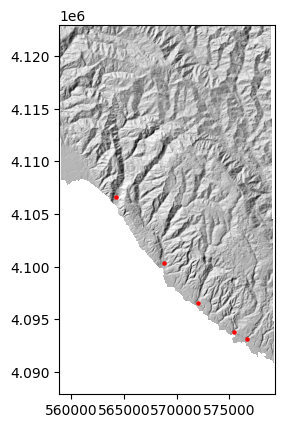

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

bbox = raster.bounds
bbox_list = [bbox.left, bbox.right, bbox.bottom, bbox.top]


# Create a figure and axes
fig, ax = plt.subplots()

img=raster.read(1)
img = np.where(img == -9999, np.nan, img)

# Add the raster image to the axes
# Note: you might need to adjust the extent and/or coordinate system to match your data
ax.imshow(img, extent=bbox_list, cmap='gray')

gdf.plot(ax=ax, markersize=5, color='red')
plt.clf

In [34]:
lsdtt_parameters = {"print_basin_raster" : "true",
                    "get_basins_from_outlets" : "true",
                    "basin_outlet_csv" : "basin_outlets.csv"}
r_prefix = Dataset_prefix+"_"+source_name +"_UTM"
w_prefix = Dataset_prefix+"_"+source_name +"_UTM"
lsdtt_drive = lsdmw.lsdtt_driver(command_line_tool = "lsdtt-chi-mapping",
                                 read_prefix = r_prefix,
                                 write_prefix= w_prefix,
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()


The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling', 'lsdtt-valley-metrics']
Testing has been done against lsdtopotools v0.7
The command line tool is: lsdtt-chi-mapping
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: SC_COP30_UTM
The write prefix is: SC_COP30_UTM
The parameter dictionary is:
{'print_basin_raster': 'true', 'get_basins_from_outlets': 'true', 'basin_outlet_csv': 'basin_outlets.csv'}
Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


Now lets look at the channels and basins using `lsdviztools`.
Again, `lsdviztools` does not make interactive plots and is much less flexible than `folium` or `imshow` but it is optimised for publication-ready figures.

In [35]:
!lsdtt-chi-mapping Test_01.driver

|| Welcome to the chi mapping tool!                    ||
|| This program has a number of options to make chi    ||
|| plots and to map out slopes in chi space.           ||
|| This program was developed by Simon M. Mudd         ||
|| Fiona J. Clubb,    Boris Gailleton                  ||
|| David T Milodowski, and Declan Valters              ||
||  at the University of Edinburgh                     ||
|| and Martin D Hurst at the University of Glasgow.    ||
|| Citation for this code is:                          ||
|| http://doi.org/10.5281/zenodo.4577879
|| If you use the k_sn routines please cite:           ||
|| https://www.doi.org/10.1002/2013JF002981            ||
|| If you use the concavity routines please cite:      ||
|| https://www.doi.org/10.5194/esurf-6-505-2018        ||
|| If you use the knickpoint routines please cite:     ||
|| https://www.doi.org/10.5194/esurf-7-211-2019        ||
|| Documentation can be found at:                      ||
|| https://lsdtopotools.github.

In [36]:
%%capture
import lsdviztools.lsdmapwrappers as lsdmw
DataDirectory = "./"
Dataset_prefix = "SC"
source_name = "COP30"
r_prefix = Dataset_prefix+"_"+source_name +"_UTM"
Base_file = r_prefix
basins_img = lsdmw.PrintBasins_Complex(DataDirectory,Base_file,cmap="gist_earth",
                             size_format="geomorphology",dpi=600, save_fig = True)

./SC_COP30_UTM_selected_basins.png


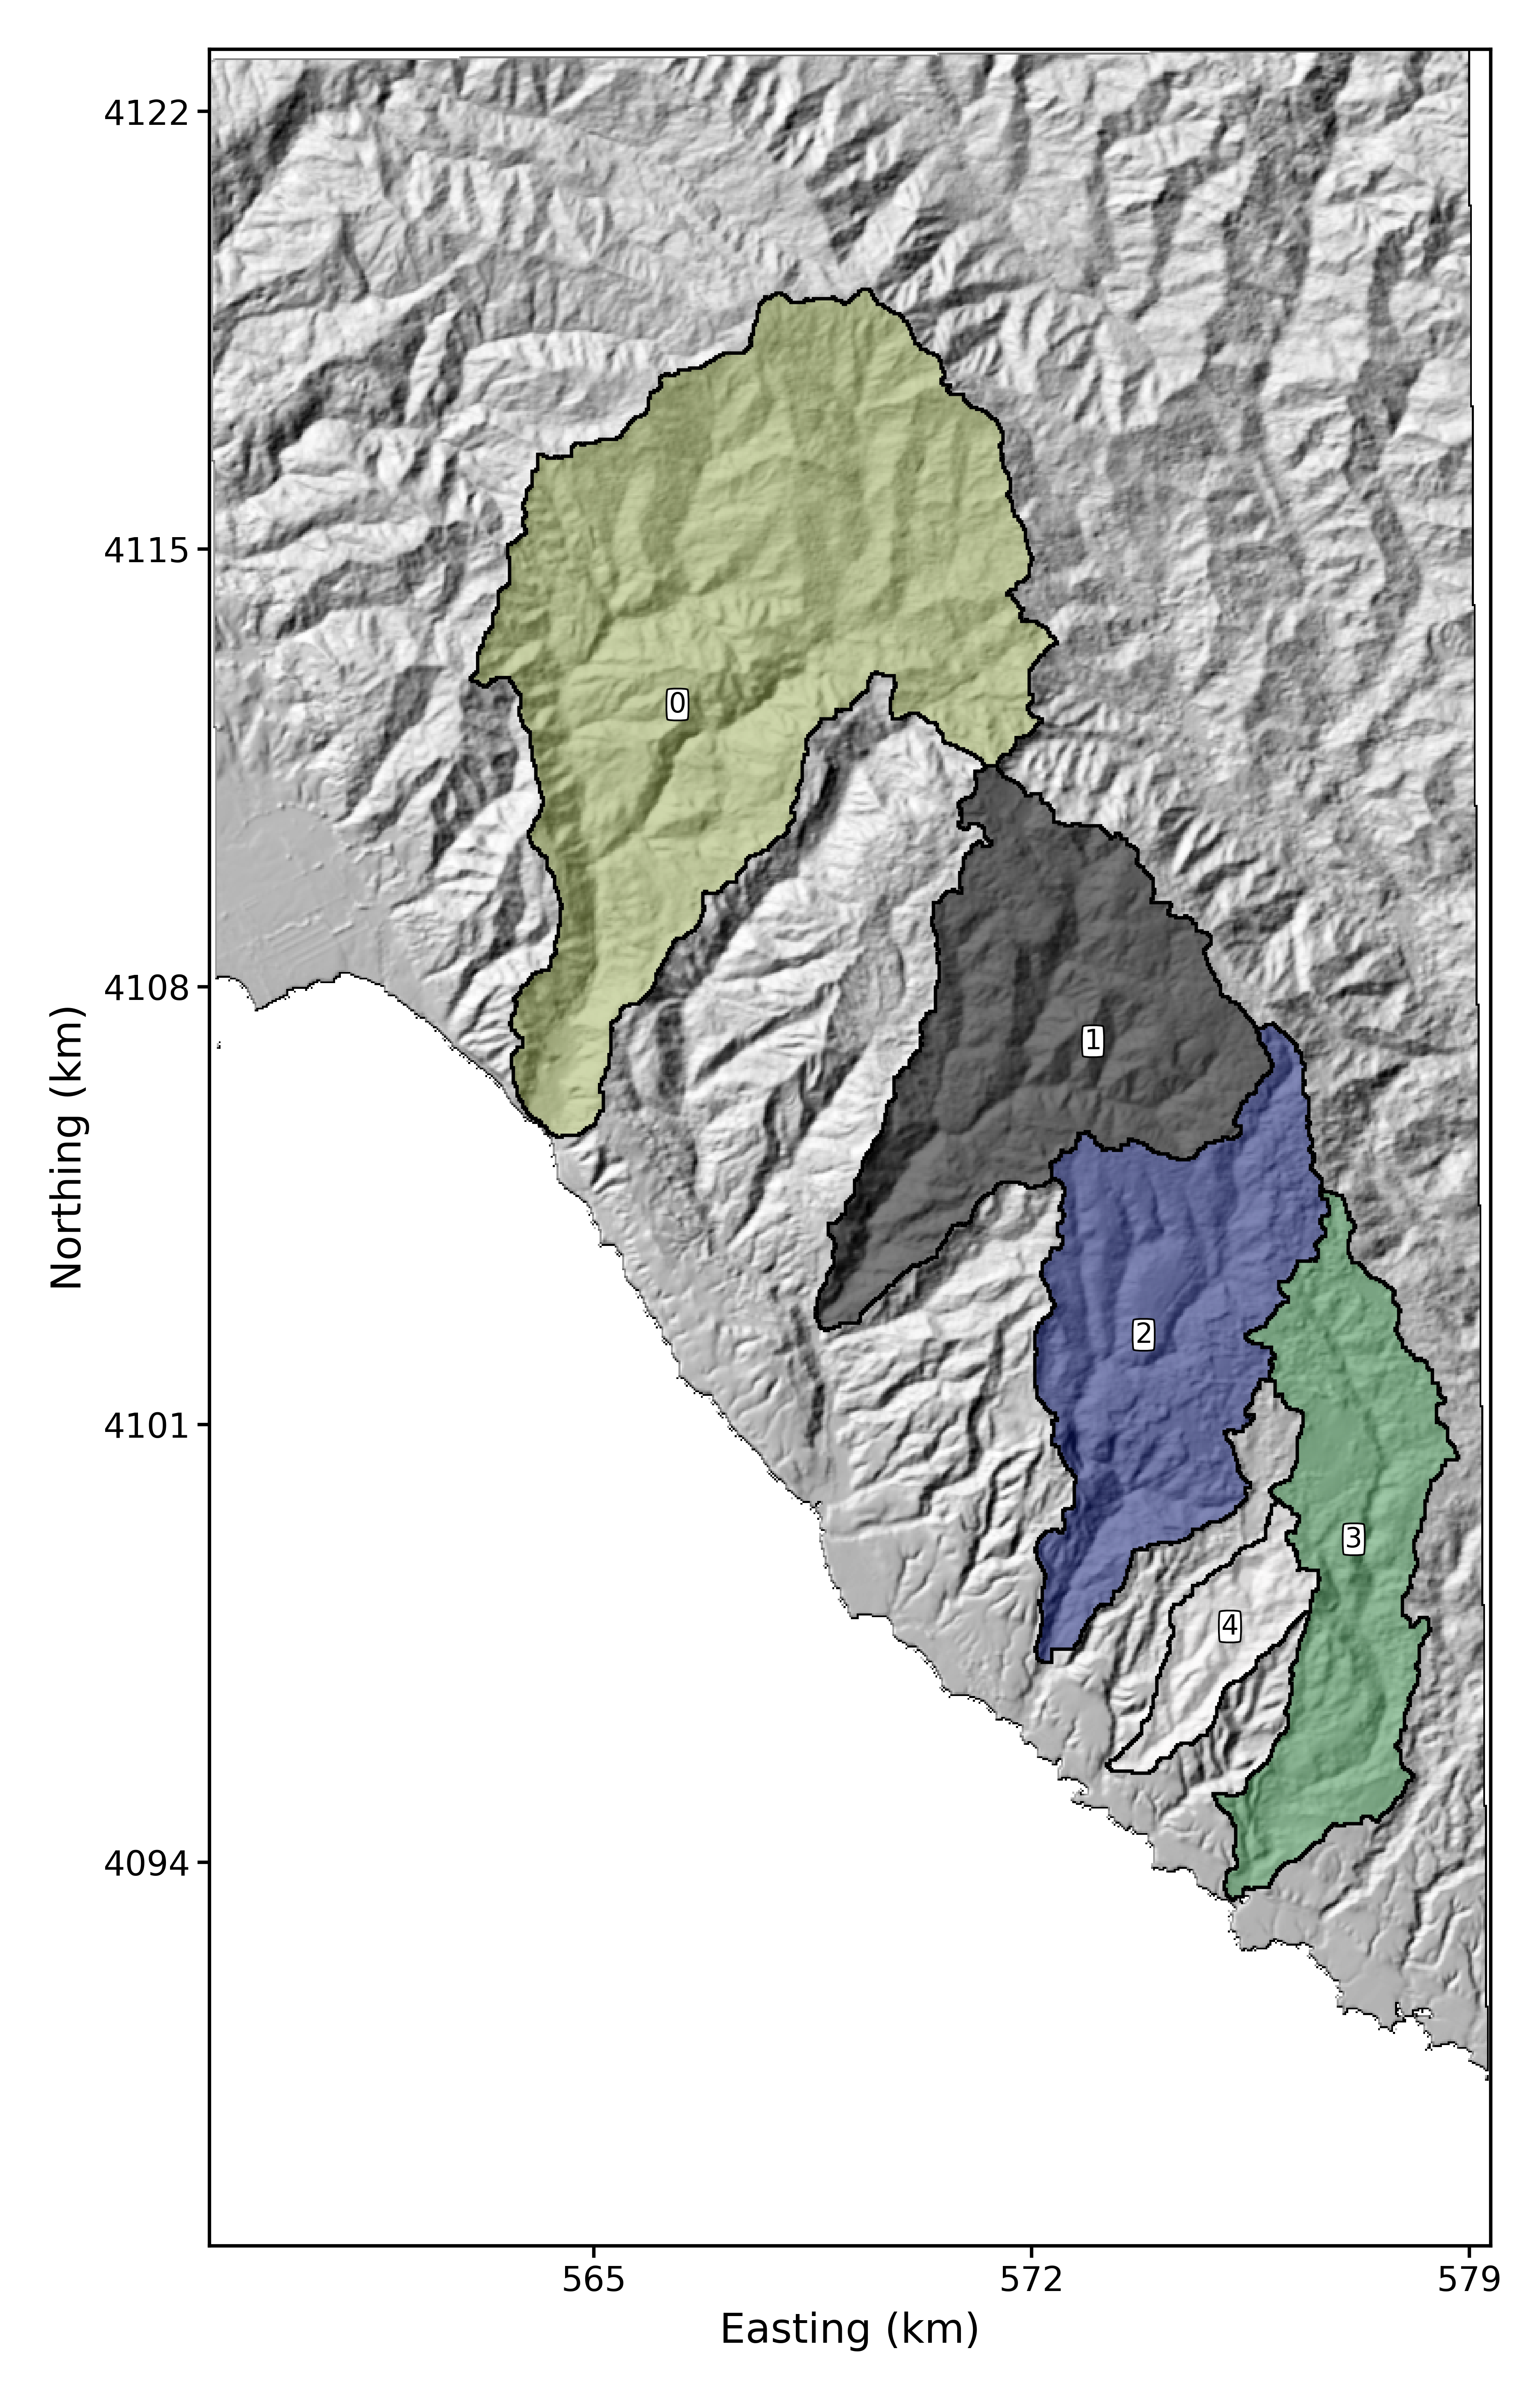

In [37]:
print(basins_img)
from IPython.display import display, Image
display(Image(filename=basins_img, width=800))

## Have a look at the $k_{sn}$ values

In [39]:
lsdtt_parameters = {"m_over_n" : "0.45",
                    "print_segmented_M_chi_map_to_csv" : "true",
                    "get_basins_from_outlets" : "true",
                    "basin_outlet_csv" : "basin_outlets.csv"}
r_prefix = Dataset_prefix+"_"+source_name +"_UTM"
w_prefix = Dataset_prefix+"_"+source_name +"_UTM"
lsdtt_drive = lsdmw.lsdtt_driver(command_line_tool = "lsdtt-chi-mapping",
                                 read_prefix = r_prefix,
                                 write_prefix= w_prefix,
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling', 'lsdtt-valley-metrics']
Testing has been done against lsdtopotools v0.7
The command line tool is: lsdtt-chi-mapping
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: SC_COP30_UTM
The write prefix is: SC_COP30_UTM
The parameter dictionary is:
{'m_over_n': '0.45', 'print_segmented_M_chi_map_to_csv': 'true', 'get_basins_from_outlets': 'true', 'basin_outlet_csv': 'basin_outlets.csv'}
Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


In [43]:
#%%capture
points_img = lsdmw.PrintPointsOverHillshade(DataDirectory,Base_file,cmap="viridis",
                                            points_fname = "SC_COP30_UTM_MChiSegmented.csv",
                                            size_format="geomorphology",dpi=600,
                                            save_fig = True,
                                            column_for_plotting = "m_chi",
                                            column_for_scaling = "drainage_area",
                                            scaled_data_in_log = True,
                                            max_point_size = 14, min_point_size =5)

I am loading the points from: SC_COP30_UTM_MChiSegmented.csv
I did not find a valid separator. I am assuming the path is ./
The object file prefix is: SC_COP30_UTM_MChiSegmented
Loading your file from csv
done
I am getting the hillshade
Your colourbar will be located: None
xsize: 683 and y size: 1171
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32610
EPSG:32610
The EPSGString is: EPSG:32610
minimum values are x: 558851.0 and y: 4087863.0
I made the ticks.
x labels are: 
['565', '572', '579']
x locations are:
[565000.0, 572000.0, 579000.0]
y labels are: 
['4094', '4101', '4108', '4115', '4122']
y locations are:
[4094000.0, 4101000.0, 4108000.0, 4115000.0, 4122000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
Now I'll get some points
I am going to plot some points for you. The EPSG string is:EPSG:32610
pointtools GetUTMEastingNorthing, getting the epsg string: EPSG:32610
WARNING you must have a recent (>=6) version of proj and pyproj (>=2.4) for this t

/usr/local/lib/python3.10/dist-packages/lsdviztools/lsdmapfigure/plottingraster.py:456: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.tick_x_labels)
/usr/local/lib/python3.10/dist-packages/lsdviztools/lsdmapfigure/plottingraster.py:457: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.tick_y_labels)


I got the easting and northing
I also got the data for scaling, which is in column drainage_area
The size of the array is: 
(3171,)
I am going to convert data to log for point scaling.
I logged (is it a verb?) your scaled data, the minimum is 5.9546765869186435 and the maximum is 7.8009849938041995 but all the values inferior to -10 will be -10
I am scaling your points for you
max is: 7.8009849938041995 and min is: 5.9546765869186435
I have got a scaled point array,
I will plot the points now.
The colourmap is: viridis
I will colour by the points
The aspect ratio is: 0.5832621690862511
I need to adjust the spacing of the colourbar.
The cbar characters are: 0 and the cbar text width is: 0.4
No colourbar
The figure size is: 
[6.25, 9.76537335285505]
Map axes are:
[0.136, 0.0665617152067169, 0.8319999999999999, 0.9129577570373703]
cbar_axes are:
None
Number of axes are: 1
I'm returning:
./SC_COP30_UTM_channels_with_basins.png


<Figure size 640x480 with 0 Axes>

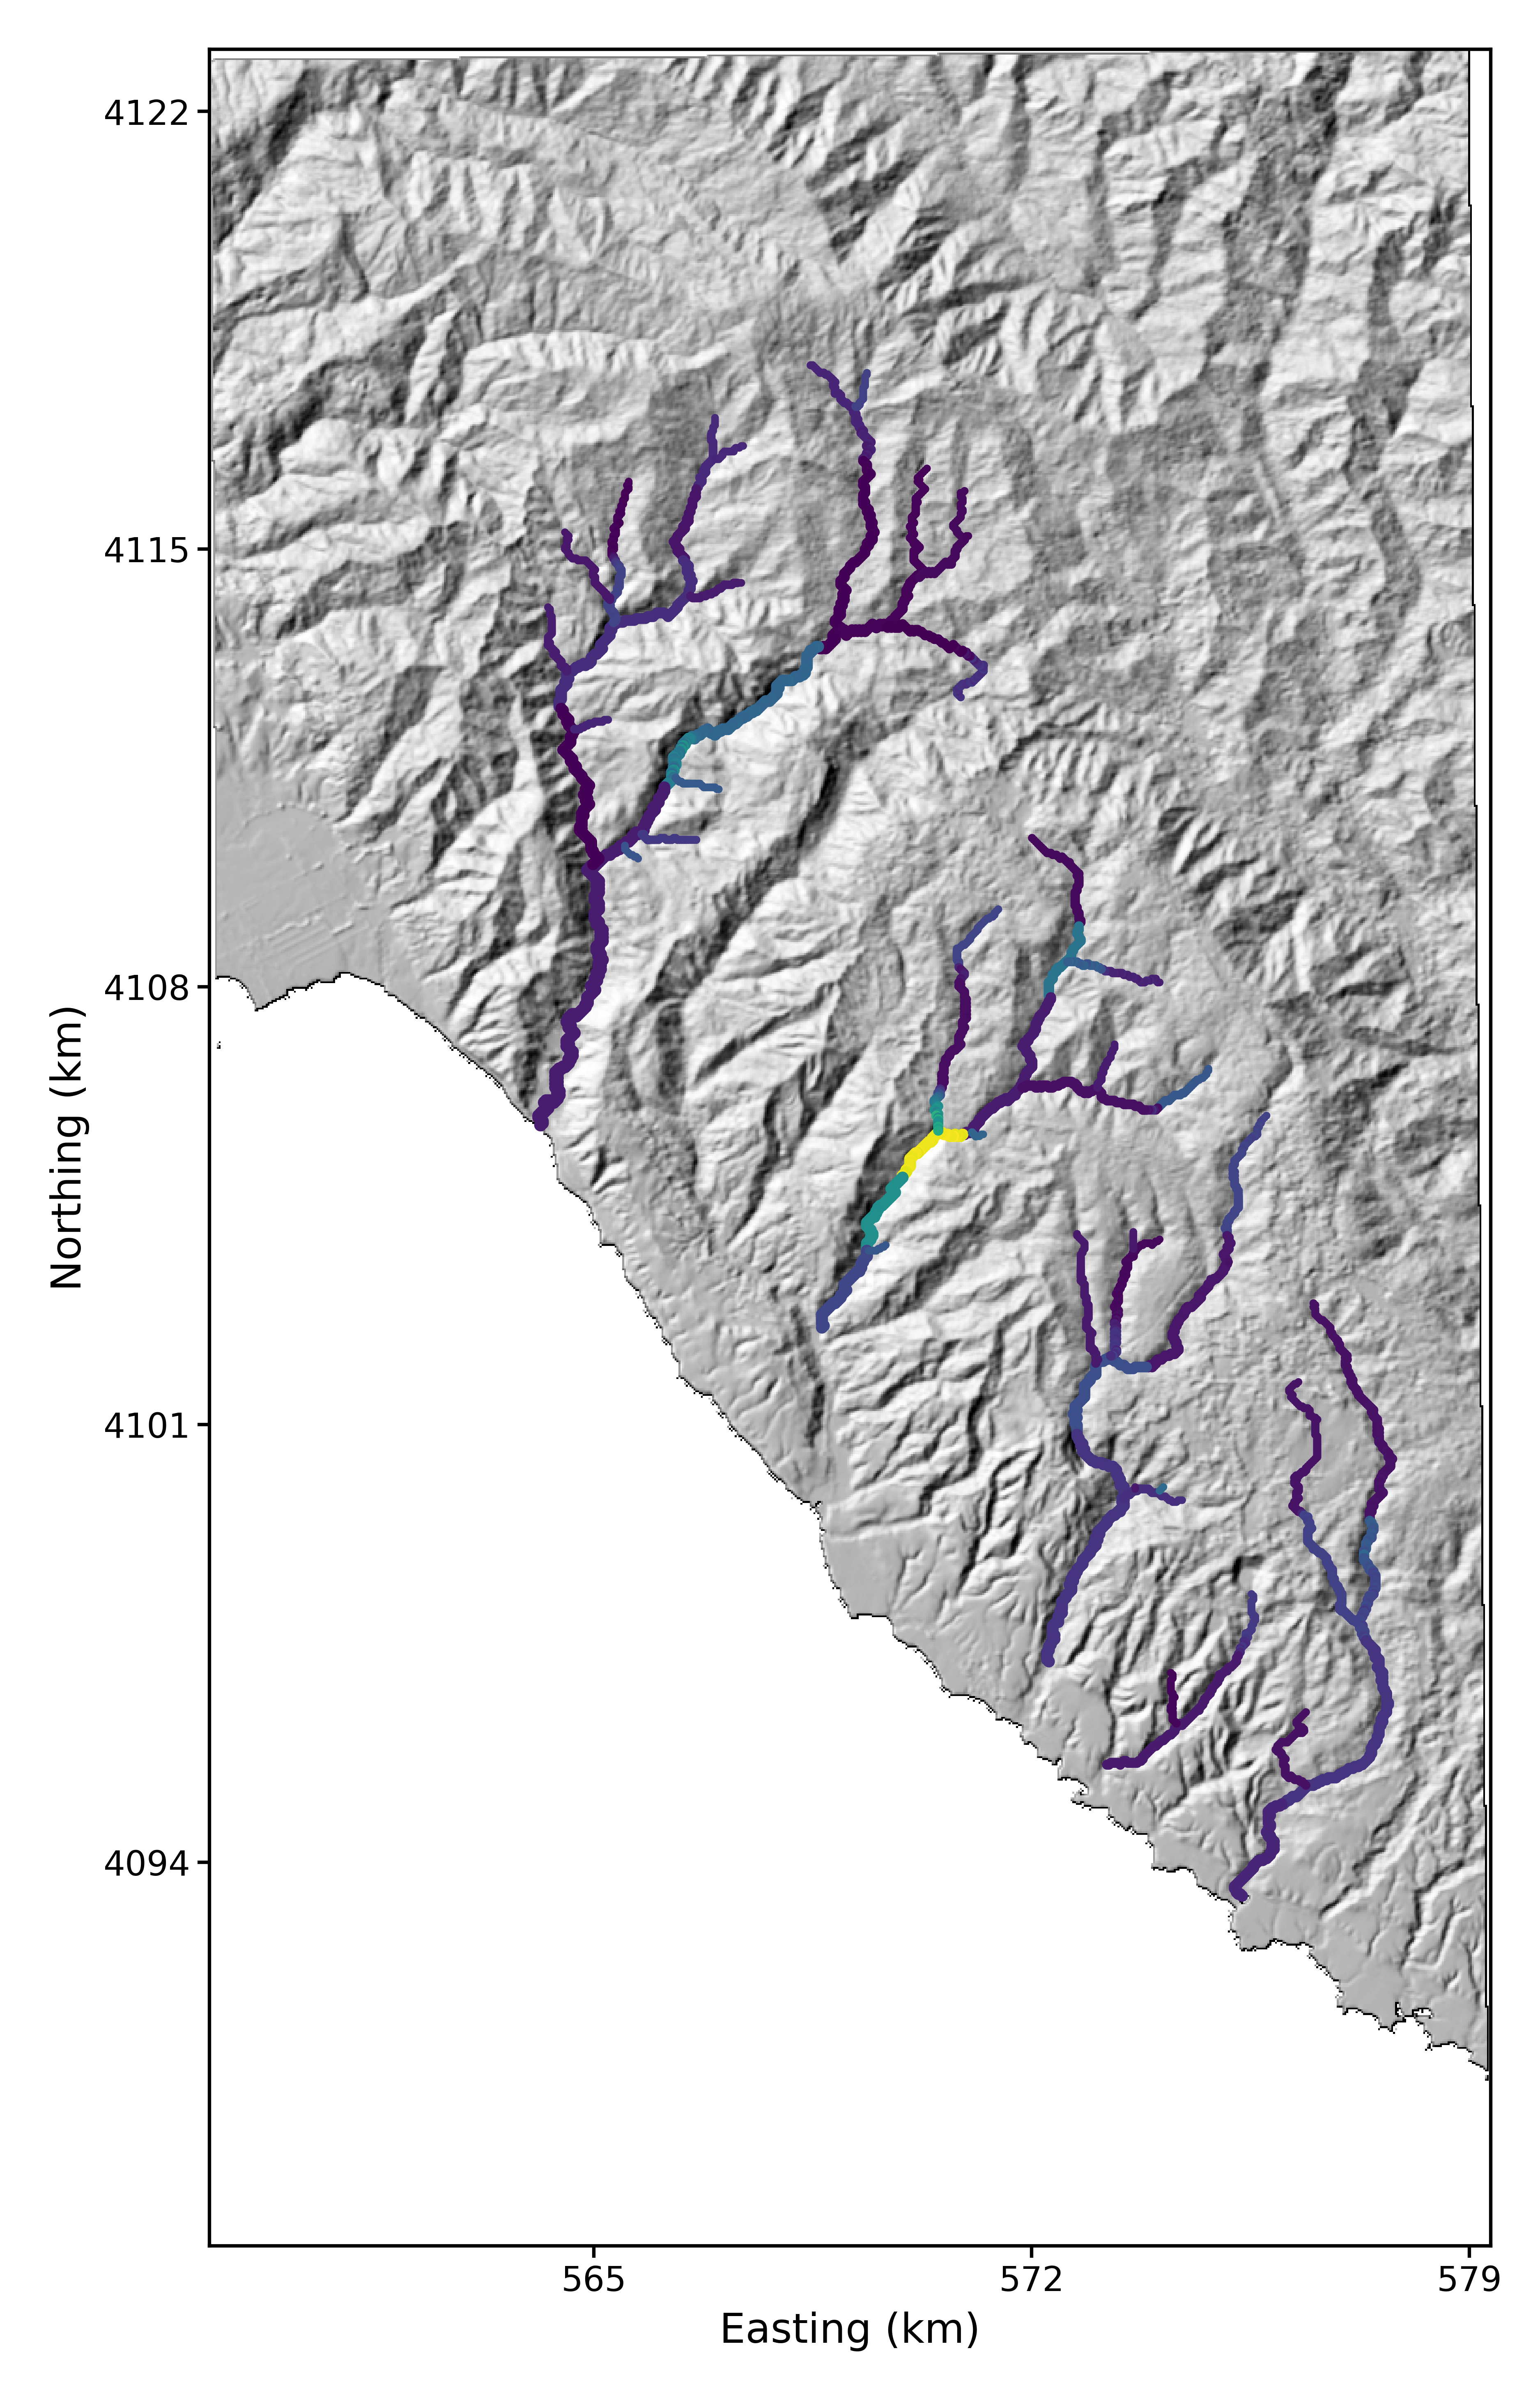

In [44]:
from IPython.display import display, Image
display(Image(filename="./SC_COP30_UTM_channels_with_basins.png", width=800))